In [32]:
# load all the necessary packges for the analysis 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [34]:
# load the data 
customer_data =pd.read_csv(r"C:\Users\adnan\Downloads\Churn_Modelling.csv")

In [36]:
## explore the data 
customer_data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
827,828,15666633,Huang,758,Spain,Male,56,1,0.00,2,1,1,10643.38,0
3132,3133,15619407,Buckley,615,France,Male,39,4,133707.09,1,1,1,108152.75,0
3944,3945,15794792,Golubev,612,France,Female,31,8,117989.76,1,1,1,54129.86,0
8008,8009,15587210,McCartney,591,Germany,Female,44,10,113581.98,1,1,0,1985.41,0
785,786,15660155,Lorenzo,792,Spain,Male,36,5,92140.15,1,0,1,67468.67,0


In [38]:
print(customer_data.shape)
print(customer_data.info())

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [40]:
#explore the data for the missing values
print(customer_data.isna().sum())
print(customer_data.isna().sum().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
0


In [42]:
# examine the balance in the data to avoide bais 
print(customer_data['Exited'].value_counts(normalize=True)*100)
print(customer_data['Gender'].value_counts(normalize=True)*100)

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


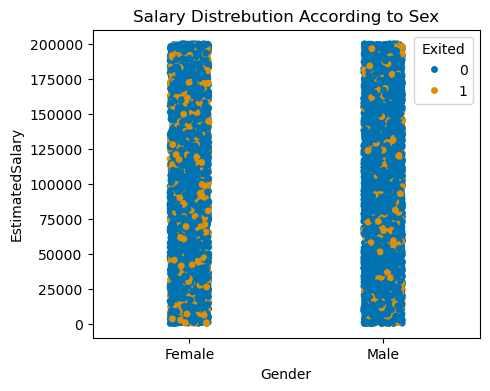

In [44]:
plt.figure(figsize=(5,4))
sns.stripplot(customer_data,palette='colorblind',hue='Exited',x='Gender',y='EstimatedSalary')
plt.title('Salary Distrebution According to Sex')
plt.show()

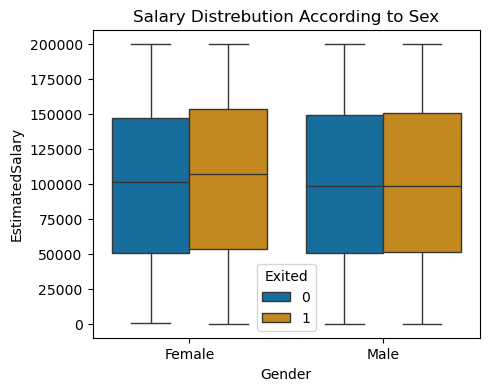

In [46]:
plt.figure(figsize=(5,4))
sns.boxplot(customer_data,palette='colorblind',hue='Exited',x='Gender',y='EstimatedSalary')
plt.title('Salary Distrebution According to Sex')
plt.show()

In [48]:
# identify the outliers 
numaric_columns=['EstimatedSalary','Balance','CreditScore']
iso_forest =IsolationForest(contamination=0.1)
customer_data['anomly']= iso_forest.fit_predict(customer_data[numaric_columns])
outlires=customer_data[customer_data['anomly']==-1]
customer_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,anomly
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [50]:
customer_data['anomly'].value_counts()

anomly
 1    9000
-1    1000
Name: count, dtype: int64

In [52]:
out = customer_data.query('anomly==-1')
out

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,anomly
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,-1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,-1
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0,-1
24,25,15625047,Yen,846,France,Female,38,5,0.00,1,1,1,187616.16,0,-1
29,30,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,9950,15798615,Wan,850,France,Female,47,9,137301.87,1,1,0,44351.77,0,-1
9971,9972,15721377,Chou,833,France,Female,34,3,144751.81,1,0,0,166472.81,0,-1
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,-1
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,-1


In [54]:
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,anomly
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.80000
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.60003
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,-1.00000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,1.00000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.00000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.00000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.00000


### After reviewing the columns with numeric featrues and compare it wih sttiatics we find that there is no an ouliers that may skewed the model because there is no huge differencr between the mean and the median for the three of them


### Feature engineering 

In [56]:
### Featrue selection drop columns with irrelevent to the model
churn_df = customer_data.drop(['RowNumber','CustomerId','Gender','Surname','anomly'],axis=1)
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# creating a loyalty veariable tis indecate that the percentsge of year that the customer has been as with the bank  
churn_df['loyaltey']= (churn_df['Tenure']/churn_df['Age']).astype(float)

In [60]:
churn_df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyaltey
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.047619
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0.190476
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.046512
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,0.128205
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,0.285714
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0.194444
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,0.071429


In [62]:
# print the uniqe vallues of the geographic col
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [113]:
# use dummy encoder for the catigorical variable 
churn_df = pd.get_dummies(churn_df, drop_first=True).astype(int)

In [115]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyaltey,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1


In [111]:
# drop the age and the tenure from the model
churn_df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyaltey,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.128205,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.285714,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,0.194444,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.071429,True,False


In [70]:
# define the targeted value y
y=churn_df['Exited']
# define the predectoer variables x
x= churn_df.drop(['Exited'],axis=1)
# splite the data into train and test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,  stratify=y,random_state=42)

In [72]:
# build the model 
gnb =GaussianNB()
gnb.fit(x_train,y_train)
# get the prediction in the training data 
y_pred = gnb.predict(x_test)

In [74]:
# evaluate our model
print('Accuracy :', '%.3f'% accuracy_score(y_test,y_pred))
print('Recall :', '%.3f'% recall_score(y_test,y_pred))

print('precision :', '%.3f'% precision_score(y_test,y_pred))
print('f1 :', '%.3f'% f1_score(y_test,y_pred))


Accuracy : 0.788
Recall : 0.051
precision : 0.356
f1 : 0.089


In [76]:
# there is a problem with recall,precision and  f1
np.unique(y_pred)

array([0, 1], dtype=int64)

In [78]:
# get desribtive statistics about the data
x.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,loyaltey
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556


In [80]:

# institiate the scaler
scaler =MinMaxScaler()
# fit the scaler to the training data

scaler.fit(x_train)
# scale the training data 
x_train =scaler.transform(x_train)
# scale the test data 
x_test=scaler.transform(x_test)


In [102]:
# fit the model 
gnb_scaled = GaussianNB()
gnb_scaled.fit(x_train,y_train)
# get pridection on test data
sؤaled_pred =gnb_scaled.predict(x_test)

In [104]:
def conf_matrix_plot(model,x_data,y_data):
    '''
    Accepts as arguments model object ,x data(test or valid) and y data(test or valid).
   Return aplot of confusion matrix for prediction on y data.
  '''
    model_pred =model.predict(x_data)
    cm= confusion_matrix(y_data,model_pred,labels=model.classes_)
    disp= ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_
                            )
    disp.plot()
    plt.show()

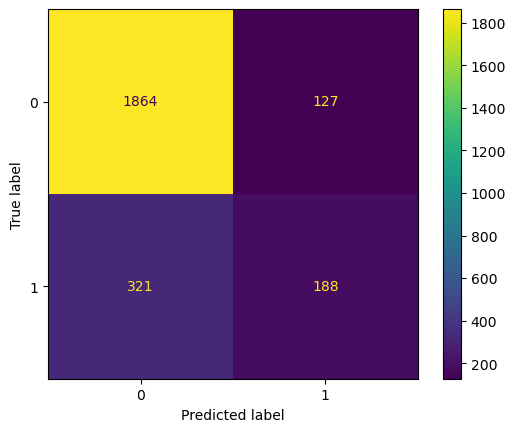

In [106]:
conf_matrix_plot(gnb_scaled,x_test,y_test)